# Start Here

December 16, 2024

This notebook demonstrates how to use the source code to analyze the Census data.

We explore the usage of three core classes:

- `Analyst`: handles analysis tasks including computation and stats
- `Respondent`: handles data storage for each individual census respondent
- `Plotter`: handles data visualization

In [81]:
import os

current_folder = os.path.basename(os.getcwd())
if current_folder == 'notebooks':
    root_path = os.path.dirname(os.path.abspath(''))
    os.chdir(root_path)

print(f'Directory set to: {os.getcwd()}')

from pprint import pprint
from src.plotter import Plotter
from src.respondent import Respondent
from src.analyst import Analyst
import src.utils as utils

from IPython import get_ipython
# Automatically reload all modules every time a line of code is executed
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')


Directory set to: /Users/aweng/code/battery-talent-census
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Start up the analysis

### Initialize the Analyst

In [3]:
analyst = Analyst()
analyst.load_data()
analyst.build_respondents_list()

# Access key class properties

In [82]:
pprint(len(analyst.respondents_list))

1008


The `respondents_list` holds a list of `Respondent` objects, each of which hold data for that particular response.

In [5]:
resp = analyst.respondents_list[0]
resp

Token:     fkqh2mecyeh4ille74ccdfkqh2d4hld5
Submitted: 2024-10-04 20:36:11
Duration:  18.72 minutes
Status:    Working

In [83]:
pprint(resp.census)

{'age': np.float64(35.0),
 'citizenship': 'Non-citizen (TN visa)',
 'country': 'United States',
 'degree': 'Chemistry',
 'education': 'Doctorate',
 'employment_status': "I'm working professionally (e.g., at a company, "
                      'national lab)',
 'ethnicity': ['Asian'],
 'gender': 'Male',
 'hours_worked': np.float64(40.0),
 'income': np.float64(120000.0),
 'military_status': 'No',
 'sentiment': {'keys': ["I feel good about what I'm working on",
                        'I feel good about my career path',
                        'I feel good about my work-life balance',
                        'I feel valued by those around me',
                        'I see opportunities for career growth'],
               'values': array([4., 4., 4., 4., 4.], shape=(5,))},
 'skills_demand': 'Scale up, the ability to keep up with and foresee '
                  'research/industry trends and directions, language abilities '
                  '(Chinese, Korean, Japanese) to learn from the bi

In [84]:
pprint(resp.company)

{'benefits_entitlements': [],
 'benefits_parental_leave_weeks': np.float64(nan),
 'benefits_priorities': {'keys': ['Mental health support',
                                  'Work-life balance initiatives',
                                  'Financial wellness programs',
                                  'Career development opportunities'],
                         'values': array([nan, nan, nan, nan])},
 'benefits_pto_weeks': np.float64(nan),
 'benefits_sick_leave_days': np.float64(nan),
 'benefits_unique': nan,
 'company_country': 'United States',
 'company_days_in_office': np.float64(4.0),
 'company_headcount': '11-50',
 'company_satisfaction': {'keys': ['I am satisfied with my compensation',
                                   'I am being underpaid compared to similar '
                                   'roles',
                                   'I am satisfied with the raises and/or '
                                   'bonuses I have been receiving'],
                          '

In [85]:
pprint(resp.student)

{'ideal_job_aspects': [],
 'ideal_job_title': nan,
 'ideal_salary': np.float64(nan),
 'ideal_value_chain': [],
 'internship_hourly_pay': np.float64(nan),
 'internship_hours_per_week': np.float64(nan),
 'internship_role': [],
 'internship_skills_unprepared': nan,
 'internship_skills_wish_learned': nan,
 'internship_top_skills': nan,
 'internship_value_chain': [],
 'num_internships': nan,
 'student_sentiment': {'keys': ['After graduating, I know what role(s) to '
                                'apply to',
                                'After graduating, I will find a job',
                                'By the time I graduate, I will have learned '
                                'the skills needed to find a job',
                                'I am optimistic about the future of the '
                                'battery industry'],
                       'values': array([nan, nan, nan, nan])}}


In [8]:
resp.is_completed_all_questions

True

In [9]:
resp.is_student

False

In [10]:
resp.is_working

True

In [11]:
resp.is_unemployed

False

# Summarize stats for all respondents

In [88]:
res_stats = analyst.summarize_stats()
pprint(res_stats)

{'mins_student_completed_list': [4.766666666666667,
                                 4.7,
                                 5.933333333333334,
                                 22.333333333333332,
                                 5.95,
                                 6.95,
                                 3.35,
                                 4.733333333333333,
                                 13.833333333333334,
                                 10.183333333333334,
                                 19.6,
                                 78.31666666666666,
                                 6.233333333333333,
                                 9.633333333333333,
                                 9.533333333333333,
                                 6.666666666666667,
                                 4.15,
                                 9.65,
                                 6.816666666666666,
                                 6.35,
                                 15.616666666666667,
         

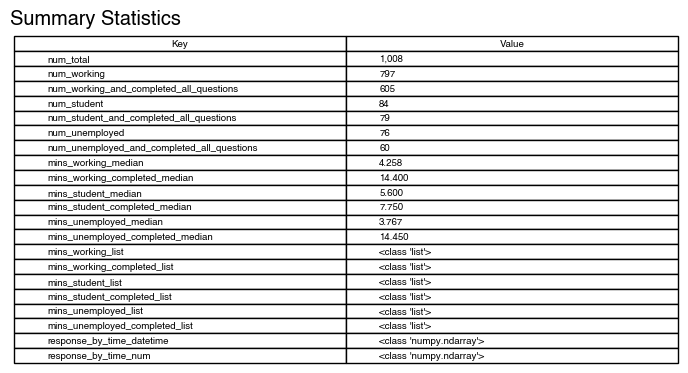

In [89]:
plotter = Plotter()
plotter.make_table_plot_from_dict(res_stats,
                                  figsize=(7,4),
                                  title='Summary Statistics',
                                  saveas='table_summary_stats.png')

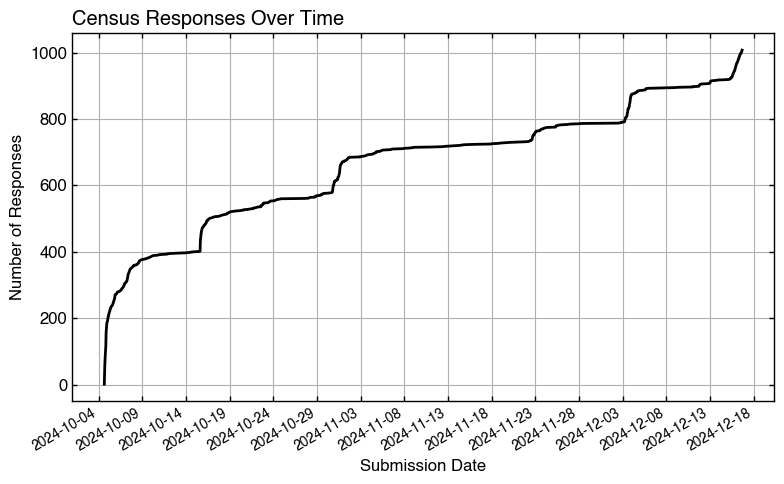

In [14]:
plotter = Plotter()

plotter.make_timeseries_plot(res_stats['response_by_time_datetime'],
                             res_stats['response_by_time_num'],
                             figsize=(8, 5),
                             title='Census Responses Over Time',
                             xlabel='Submission Date',
                             ylabel='Number of Responses',
                             saveas='census_responses_over_time.png')

In [90]:
res_census_backgrounds = analyst.summarize_census_backgrounds()
pprint(res_census_backgrounds)

{'citizenship': {'Blue Card': 1,
                 'Citizen (foreign-born)': 106,
                 'Citizen (native-born)': 574,
                 'Decline to answer': 27,
                 'Dependent visa': 1,
                 'EU Residence card': 1,
                 'European passport (German)': 1,
                 'Green Card holder': 1,
                 'Indian': 1,
                 'J1': 1,
                 'Non-citizen (F1/M1/OPT holder)': 38,
                 'Non-citizen (H-1B visa)': 49,
                 'Non-citizen (Other)': 116,
                 'Non-citizen (TN visa)': 11,
                 'Permanent': 1,
                 'Permanent resident': 1,
                 'Residence to live work, do business and remain': 1,
                 'Settlement VISA': 1},
 'country': {'Argentina': 4,
             'Australia': 16,
             'Austria': 3,
             'Belgium': 13,
             'Brazil': 1,
             'Canada': 35,
             'Chile': 1,
             'China': 10,
       

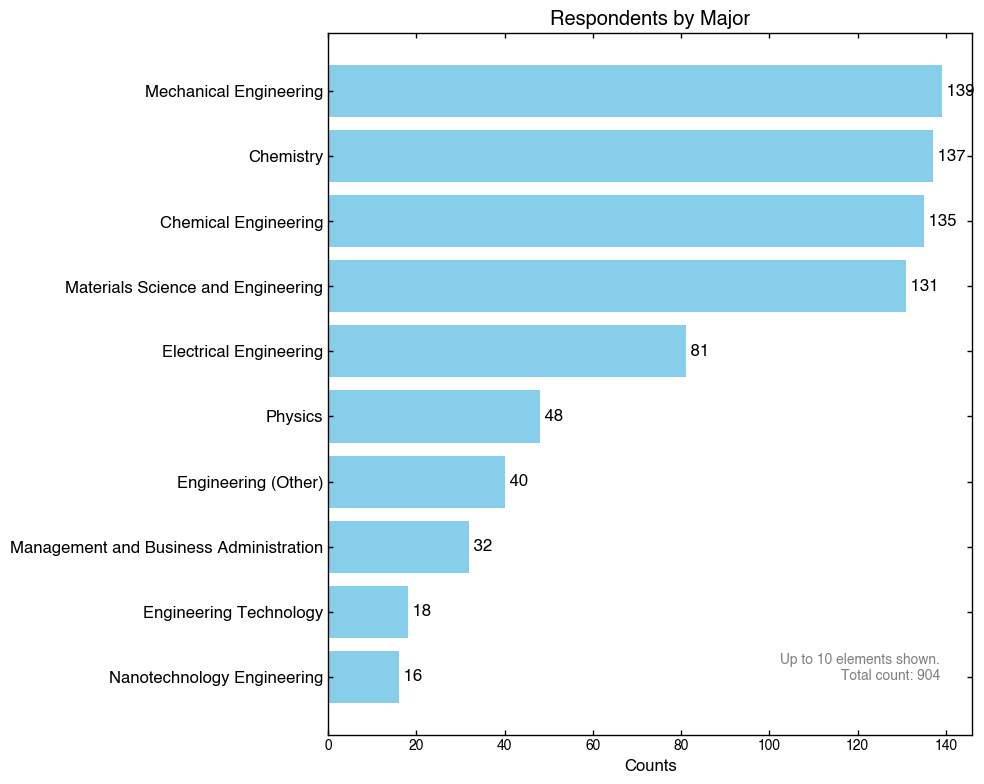

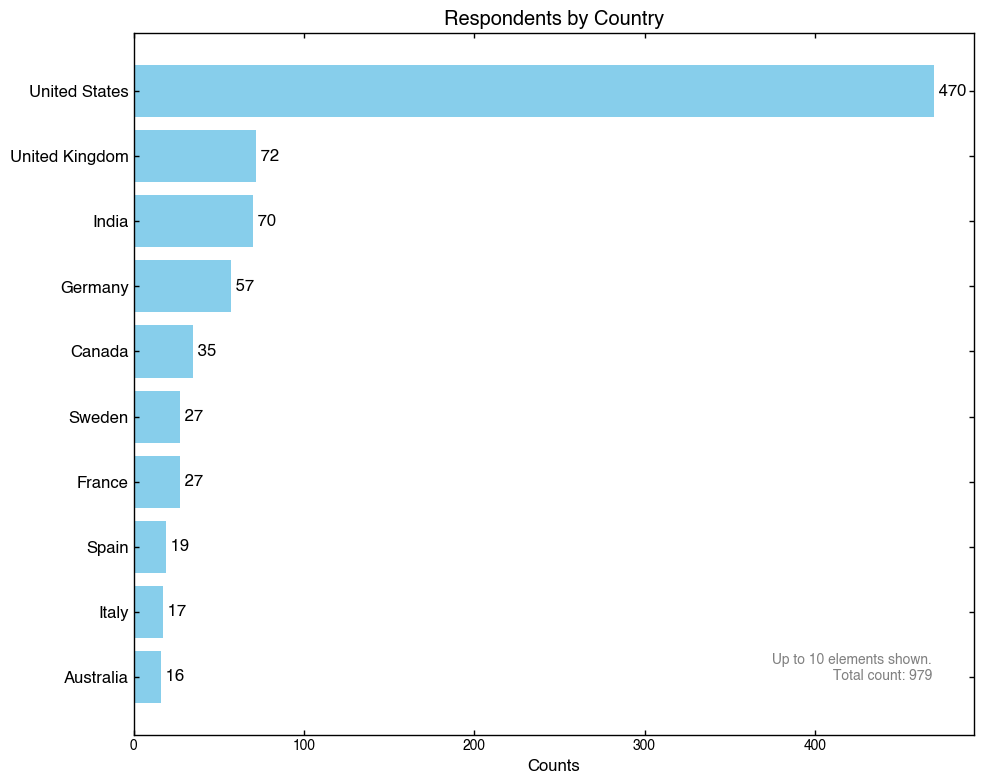

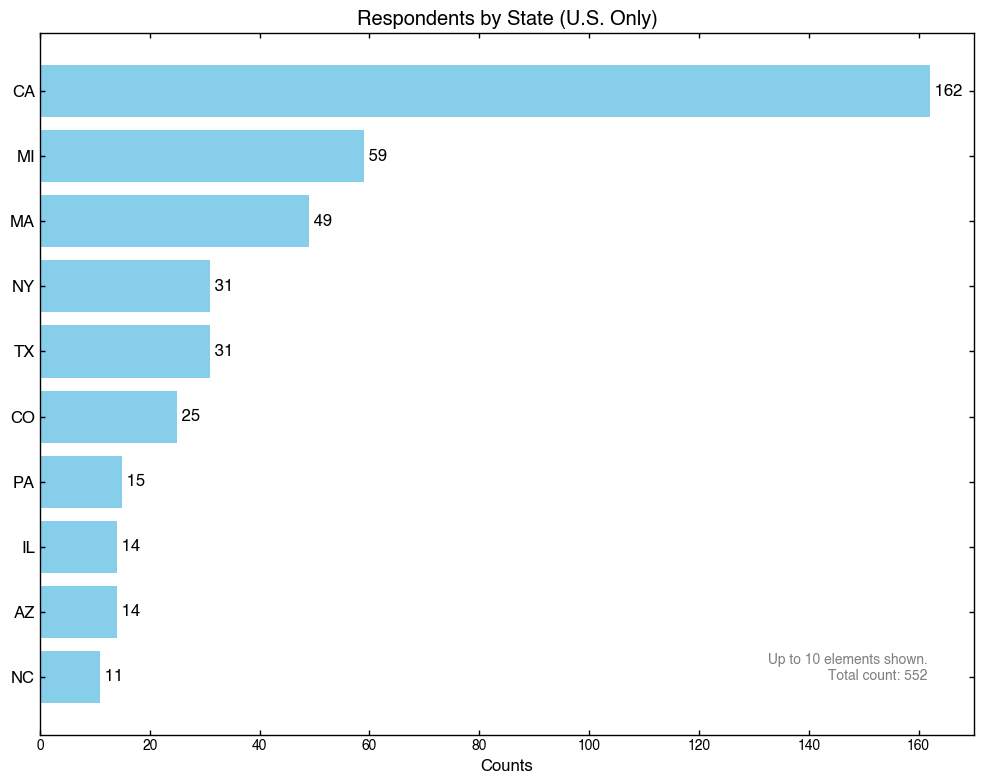

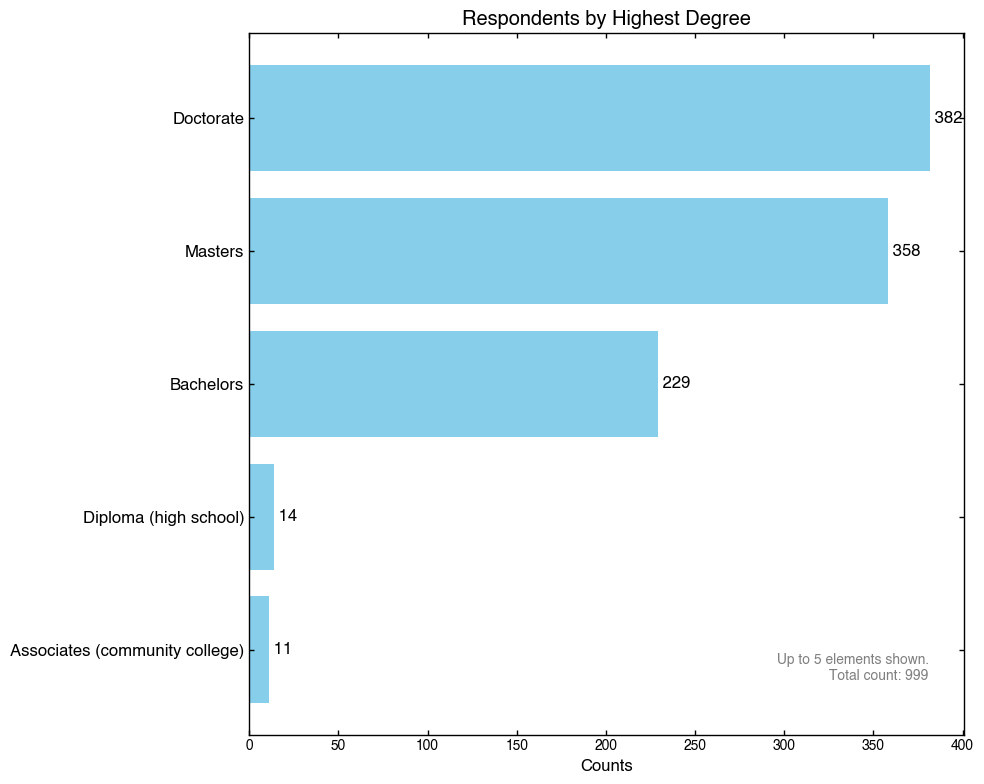

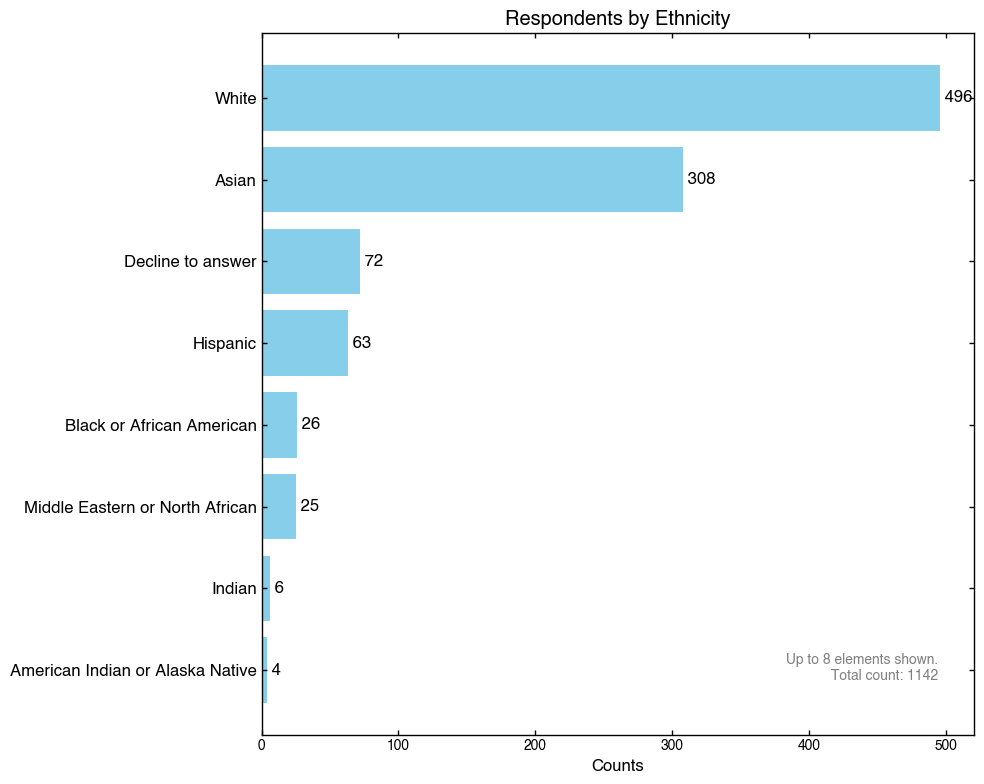

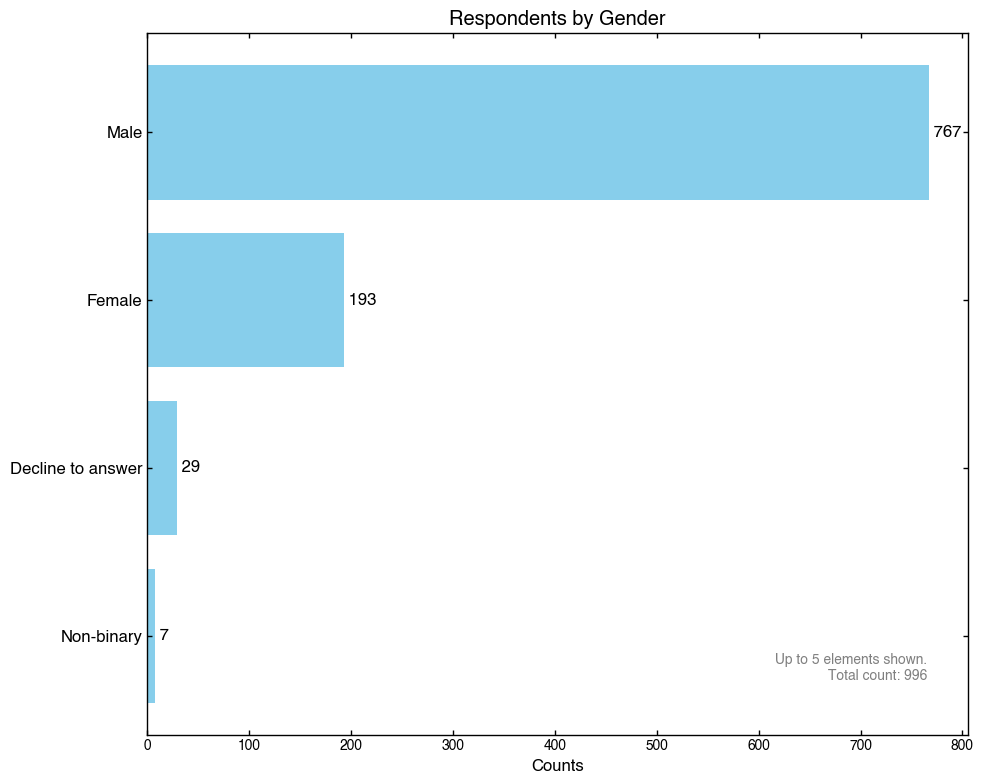

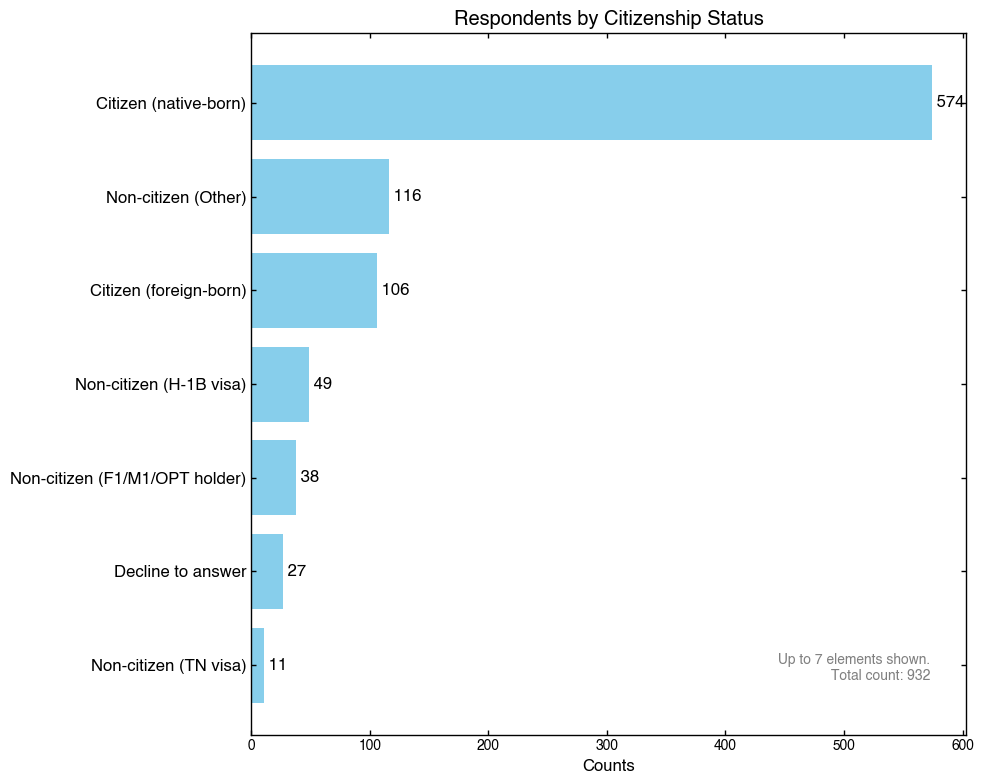

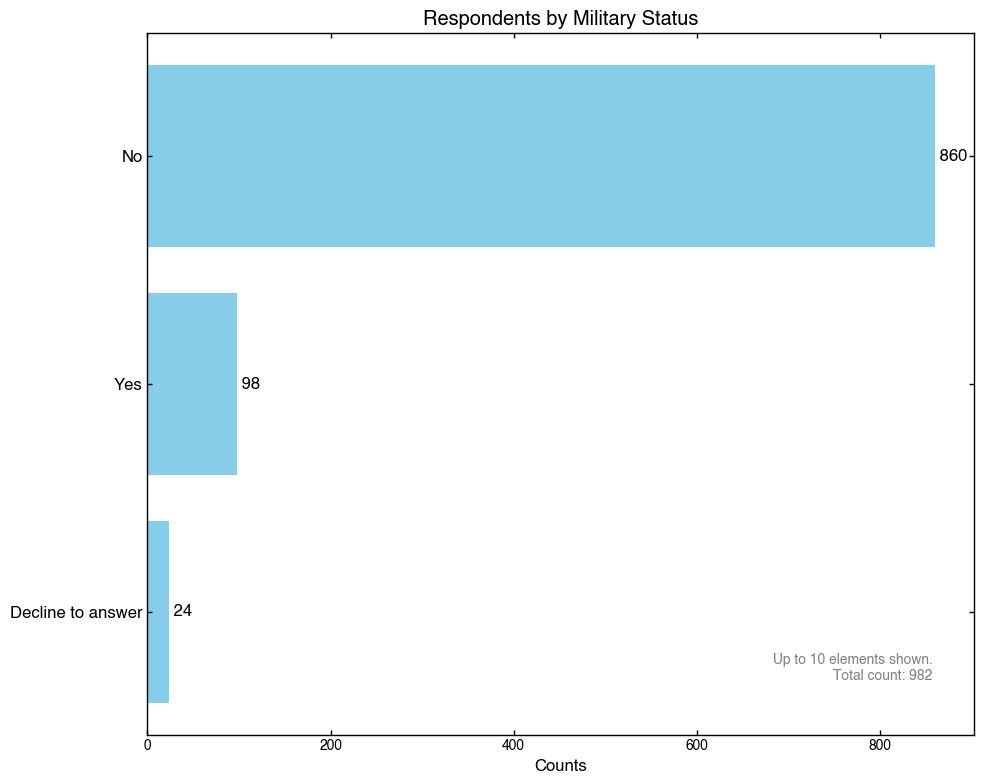

In [76]:
plotter = Plotter()
plotter.make_bar_plot_from_dict(res_census_backgrounds['degree'],
                                title='Respondents by Major',
                                saveas='respondents_major.png',
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['country'],
                                title='Respondents by Country',
                                saveas='respondents_country.png',
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['state'],
                                title='Respondents by State (U.S. Only)',
                                saveas='respondents_state.png',
                                exclusions=['None'],
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['education'],
                                title='Respondents by Highest Degree',
                                saveas='respondents_degree.png',
                                num_elements=5,
                                sorted=True)

# 'Latino' and 'or Spanish origin' are already covered under the category
# 'Hispanic'. This is an artefact of the string splitting which interpreted the
# commas within the string as different categories when they're not.
plotter.make_bar_plot_from_dict(res_census_backgrounds['ethnicity'],
                                title='Respondents by Ethnicity',
                                saveas='respondents_ethnicity.png',
                                exclusions=['Latino', 'or Spanish origin'],
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['gender'],
                                title='Respondents by Gender',
                                saveas='respondents_gender.png',
                                num_elements=5,
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['citizenship'],
                                title='Respondents by Citizenship Status',
                                saveas='respondents_citizenship.png',
                                num_elements=7,
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['military_status'],
                                title='Respondents by Military Status',
                                saveas='respondents_military.png',
                                sorted=True)

In [91]:
res_census_sentiment = analyst.summarize_census_sentiment()
pprint(res_census_sentiment)

{'keys': ["I feel good about what I'm working on",
          'I feel good about my career path',
          'I feel good about my work-life balance',
          'I feel valued by those around me',
          'I see opportunities for career growth'],
 'mean': array([4.07, 3.81, 3.57, 3.73, 3.75], shape=(5,)),
 'stdev': array([0.98, 1.05, 1.08, 1.11, 1.14], shape=(5,)),
 'submit_time': array([Timestamp('2024-10-04 20:36:11'), Timestamp('2024-10-04 20:35:28'),
       Timestamp('2024-10-04 20:34:34'), ...,
       Timestamp('2024-12-16 15:40:44'), Timestamp('2024-12-16 16:02:03'),
       Timestamp('2024-12-16 16:05:31')], shape=(1008,), dtype=object),
 'values': array([[4., 4., 4., 4., 4.],
       [5., 4., 3., 3., 4.],
       [4., 4., 3., 4., 5.],
       ...,
       [4., 4., 4., 4., 4.],
       [4., 3., 4., 3., 3.],
       [5., 5., 4., 5., 5.]], shape=(1008, 5))}


In [131]:
res_census_skills_demand = analyst.summarize_census_skills_demand()
pprint(res_census_skills_demand)

{'skills_in_demand': ['Scale up, the ability to keep up with and foresee '
                      'research/industry trends and directions, language '
                      'abilities (Chinese, Korean, Japanese) to learn from the '
                      'bigger battery markets',
                      'Design for Reliability,   Test',
                      'Agile, Innovative, Communication',
                      'design, manufacturing, and testing',
                      'Electrochemistry, Process, Data Analysis',
                      'Scientific Observation, Data Analysis, ability to '
                      'contribute to a team',
                      'Data analysis; research and experimentation; '
                      'presentation skills',
                      'data science, manufacturing, pouch cells',
                      'Technical Knowledge; Software; Entrepreneurship',
                      'BMS, Safety, and process engineer',
                      '[cell knowledge]',
     

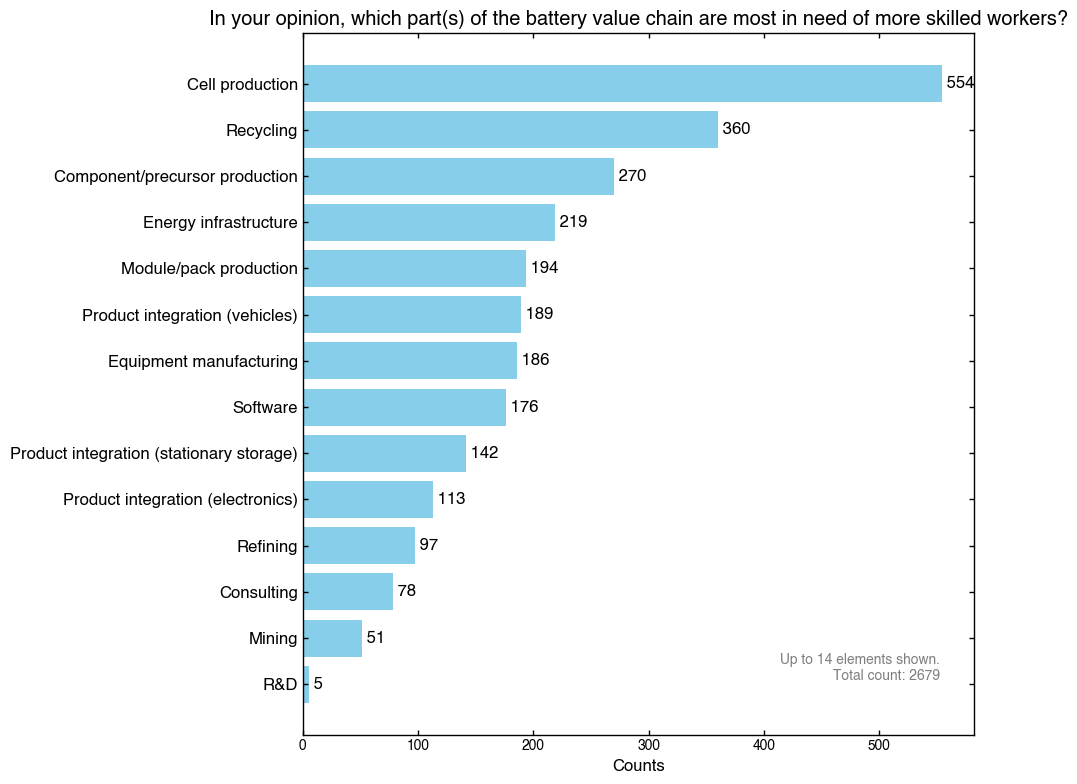

In [126]:
plotter.make_bar_plot_from_dict(
    res_census_skills_demand['value_chain_in_demand'],
    title='In your opinion, which part(s) of the battery value chain are most in need of more skilled workers?',
    saveas='census_value_chain_in_demand.png',
    num_elements=15,
    exclusions=['mobility)'],
    sorted=True,
    replacements={'Product integration (vehicles' : 'Product integration (vehicles)'})

# Summarize data from professional workers

In [116]:
res_company_salary = analyst.summarize_company_salary()
pprint(res_company_salary)

{'salary_base_list': array([125000., 125000., 145000., ...,  45000., 134000.,     nan],
      shape=(665,)),
 'salary_base_median': np.float64(130000.0),
 'salary_base_std': np.float64(263054387.7582982),
 'salary_comp_types': {'401K Match': 1,
                       '401k company match': 1,
                       '40€ tax free vouchers': 1,
                       'Accommodation': 1,
                       'Acquisition bonus': 1,
                       'Advisory roles': 1,
                       'Bonuses (based on company performance)': 282,
                       'Bonuses (based on individual performance)': 279,
                       'Bonuses (based on retention)': 40,
                       'Bonuses on festivals': 1,
                       'Cell phone': 1,
                       'Childcare expense reimbursement': 29,
                       'Commissions': 29,
                       'Company Car': 1,
                       'Company car': 1,
                       'Distribution - I own

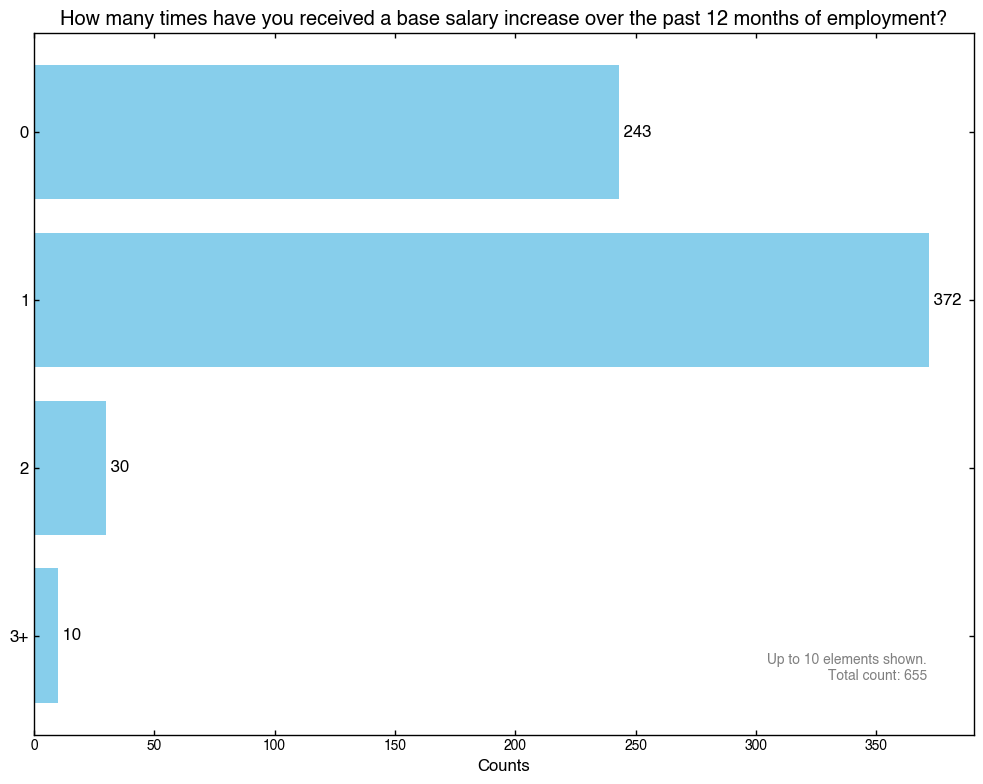

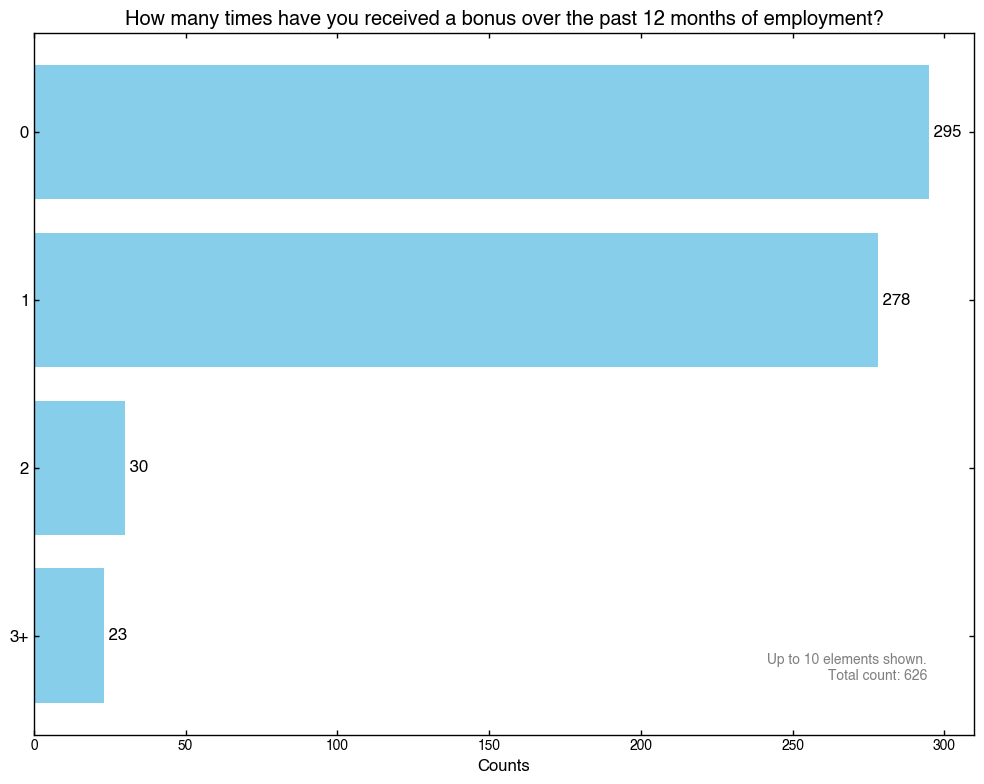

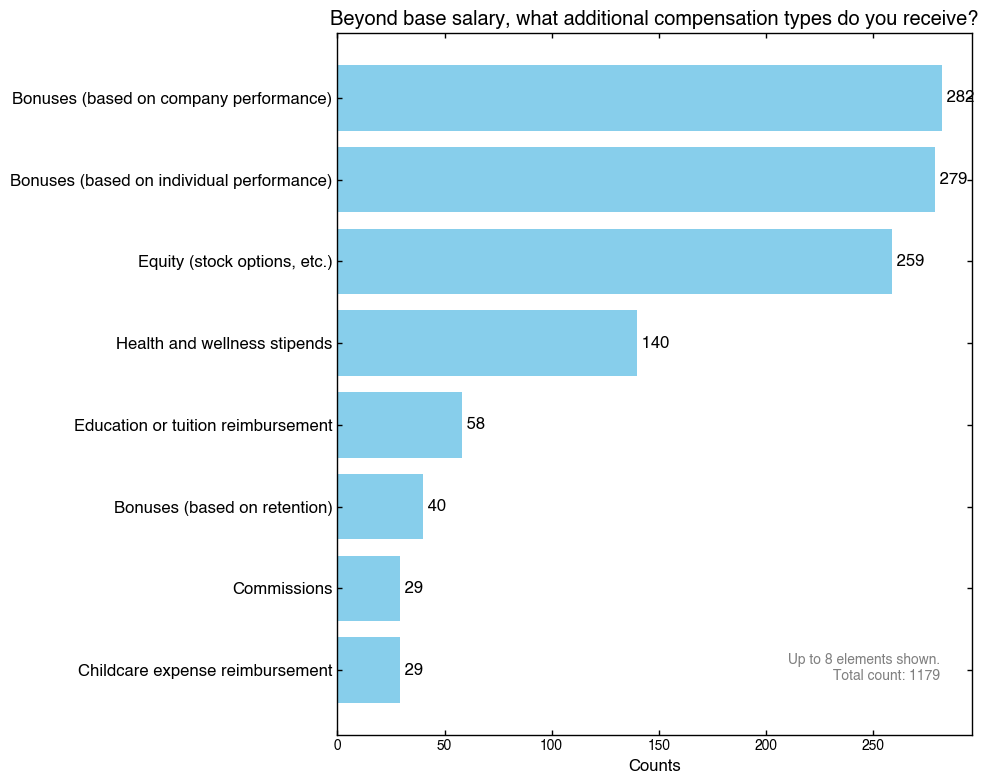

In [125]:
plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_salary['salary_num_raises'], by='keys', reverse=False),
    title='How many times have you received a base salary increase over the past 12 months of employment?',
    saveas='company_salary_num_raises.png'
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_salary['salary_num_bonuses'], by='keys', reverse=False),
    title='How many times have you received a bonus over the past 12 months of employment?',
    saveas='company_salary_num_bonuses.png'
)

plotter.make_bar_plot_from_dict(
    res_company_salary['salary_comp_types'],
    title='Beyond base salary, what additional compensation types do you receive?',
    saveas='company_salary_comp_types.png',
    exclusions=['options', 'etc.)'],
    replacements={'Equity (stock' : 'Equity (stock options, etc.)'},
    sorted=True
)

In [127]:
res_company_info = analyst.summarize_company_info()
pprint(res_company_info)

{'company_country': {'Argentina': 2,
                     'Australia': 7,
                     'Belgium': 8,
                     'Canada': 23,
                     'Chile': 1,
                     'China': 11,
                     'Czech Republic': 1,
                     'Denmark': 3,
                     'Estonia': 1,
                     'Finland': 3,
                     'France': 18,
                     'Germany': 41,
                     'Hungary': 1,
                     'India': 40,
                     'Indonesia': 2,
                     'Iran': 3,
                     'Ireland {Republic}': 2,
                     'Israel': 4,
                     'Italy': 13,
                     'Japan': 3,
                     'Kenya': 1,
                     'Korea South': 3,
                     'Luxembourg': 1,
                     'Malaysia': 3,
                     'Mexico': 3,
                     'Morocco': 1,
                     'Netherlands': 11,
                     'Nigeria':

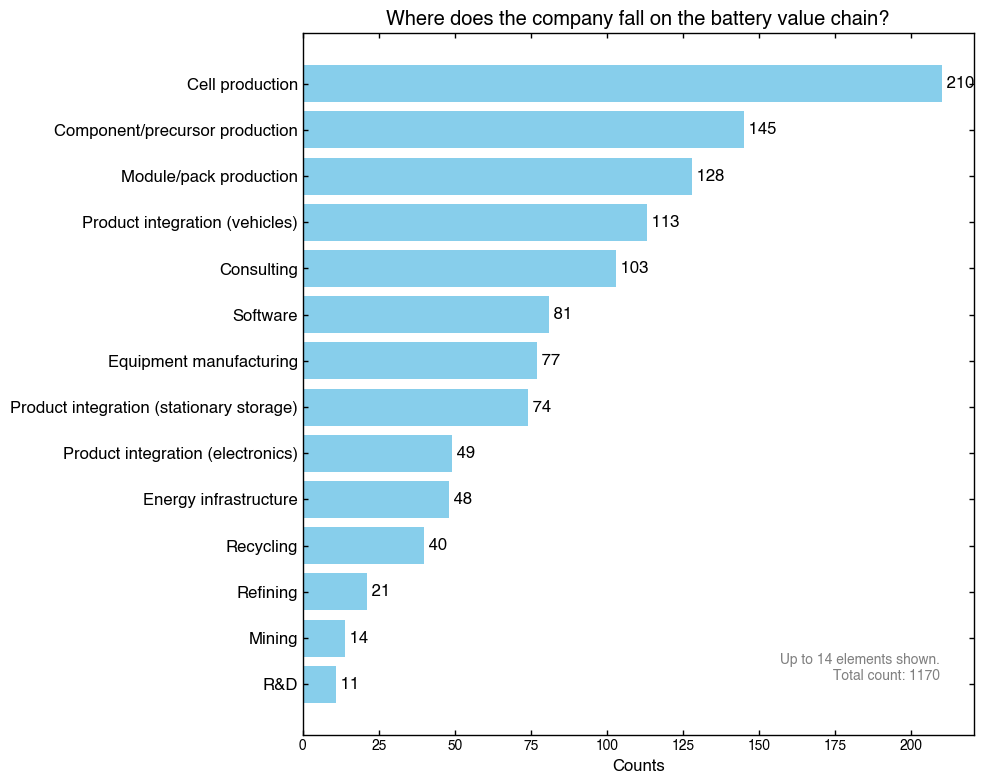

In [128]:
plotter.make_bar_plot_from_dict(res_company_info['company_value_chain'],
                                title='Where does the company fall on the battery value chain?',
                                saveas='company_value_chain.png',
                                num_elements=15,
                                exclusions=['mobility)'],
                                sorted=True,
                                replacements={'Product integration (vehicles' : 'Product integration (vehicles)'})

In [132]:
res_company_role = analyst.summarize_company_role()
pprint(res_company_role)

{'role_level': {'Career': 112,
                'Developing': 61,
                'Director/VP': 65,
                'Entry': 26,
                'Executive': 44,
                'Expert': 91,
                'Manager': 92,
                'Senior': 167},
 'role_prev_industries': {'No': 217,
                          'Yes, in a different role': 187,
                          'Yes, in a similar role': 254},
 'role_prev_role_list': ['Distinguished Member of Technical Staff, Design for '
                         'Reliability',
                         'Administrative Assistant',
                         'product manger',
                         'Machine Design Engineer',
                         'Mechanical Engineer - Turbine Airfoils',
                         'Investment Analyst',
                         'Product development - body exterior',
                         'Director of R&D',
                         'Simulation engineer',
                         'Automotive engineering for 

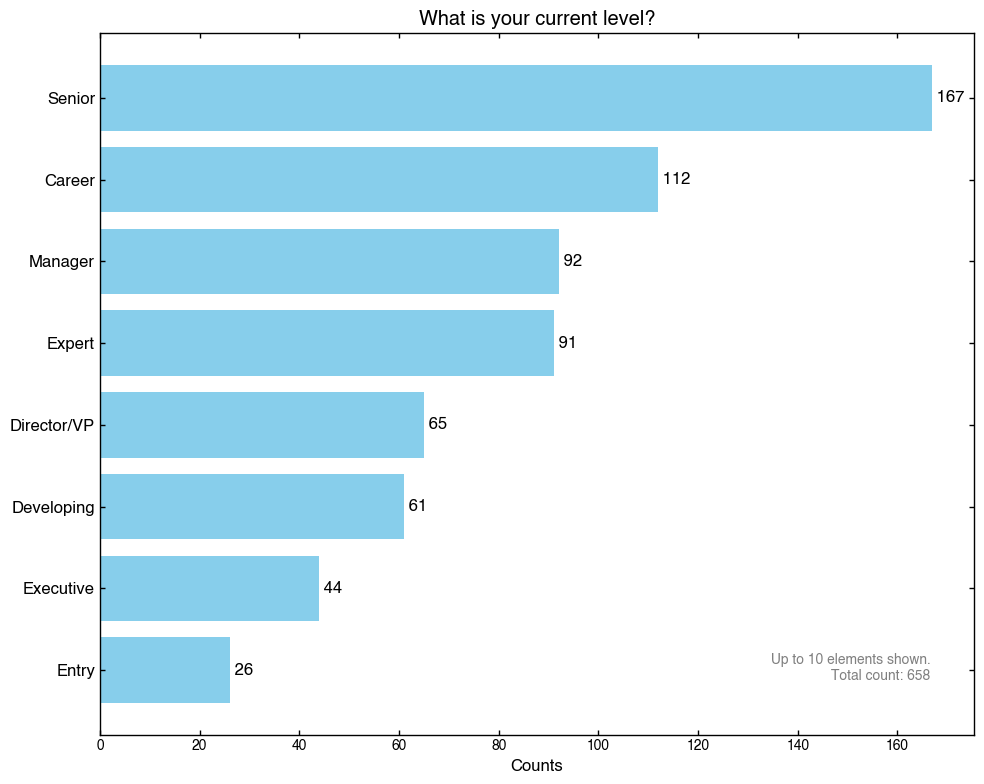

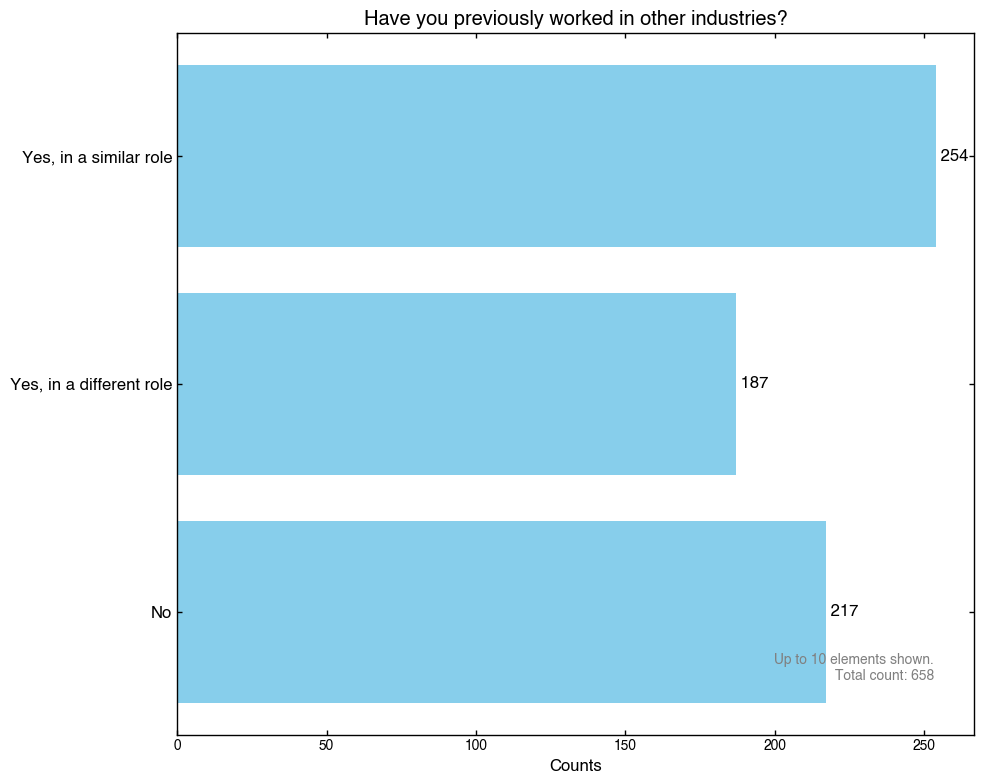

In [137]:
plotter.make_bar_plot_from_dict(res_company_role['role_level'],
                                title='What is your current level?',
                                saveas='company_role_level.png',
                                sorted=True
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_role['role_prev_industries'], by='keys', reverse=True),
    title='Have you previously worked in other industries?',
    saveas='company_role_previous_industries.png'
)

# Filter on subpopulations

In [20]:
filtered_list = analyst.filter_respondents_on(is_student=True,
                                              gender='Female')
print(len(filtered_list))

22


# Summarize stats for subpopulations

In [28]:
res = analyst.summarize_census_skills_demand(filtered_list)
[print(x) for x in res.items()];


('skills_in_demand', ['Data analysis, statistics, communication', 'troubleshooting, learning, communication', 'Materials knowledge; research experience; understanding of basic science', 'Coding; Electrochemistry knowledge', nan, '"Communication; collaboration;team work;AI")', 'Supply chain knowledge; Ability to work in a team; Coating knowledge', 'electrochemical testing; programming, data analysis', 'Controls(bms), material discovery (ml AI)', 'Machine learning, modeling, characterization testing', 'Most in demand is different from overlooked… underappreciated skills are data analytics; science communication; mentorship and community building', 'electrochemistry, manufacturing, data analyses', 'Process engineering, manufacturing-related, modelling', nan, 'BMS; Recycling; Data analysis', 'computational skills, battery modelling, data analysis', 'teamwork; communication; presentation', 'clear communication, cell-level design, BMS tuning', 'Critical thinking, creativity, science communic

# Study company information

Operate on the subset of data corresponding to working professionals who have completed the survey in its entirety.

In [31]:
res = analyst.summarize_company_satisfaction()
res

{'keys': ['I am satisfied with my compensation',
  'I am being underpaid compared to similar roles',
  'I am satisfied with the raises and/or bonuses I have been receiving'],
 'values': array([[3., 4., 2.],
        [4., 2., 3.],
        [3., 5., 2.],
        ...,
        [2., 3., 3.],
        [4., 2., 4.],
        [4., 1., 4.]], shape=(665, 3)),
 'submit_time': array([Timestamp('2024-10-04 20:36:11'), Timestamp('2024-10-04 20:35:28'),
        Timestamp('2024-10-04 20:34:34'), Timestamp('2024-10-04 20:34:32'),
        Timestamp('2024-10-04 20:31:17'), Timestamp('2024-10-04 20:28:57'),
        Timestamp('2024-10-04 20:23:39'), Timestamp('2024-10-04 20:22:55'),
        Timestamp('2024-10-04 20:22:39'), Timestamp('2024-10-04 20:16:00'),
        Timestamp('2024-10-04 20:15:36'), Timestamp('2024-10-04 20:14:41'),
        Timestamp('2024-10-04 20:12:39'), Timestamp('2024-10-04 20:09:39'),
        Timestamp('2024-10-04 20:08:20'), Timestamp('2024-10-04 20:02:18'),
        Timestamp('2024-10-04